In [3]:
#%pip install fastf1
#Install this to get the data.

In [90]:
import fastf1

In [92]:
session = fastf1.get_session(2021, 7, 'Q')
session.name
session.date
session.event
session.event['EventName']
event = fastf1.get_event(2021, 7)
event

RoundNumber                                                     7
Country                                                    France
Location                                             Le Castellet
OfficialEventName    FORMULA 1 EMIRATES GRAND PRIX DE FRANCE 2021
EventDate                                     2021-06-20 00:00:00
EventName                                       French Grand Prix
EventFormat                                          conventional
Session1                                               Practice 1
Session1Date                            2021-06-18 11:30:00+02:00
Session1DateUtc                               2021-06-18 09:30:00
Session2                                               Practice 2
Session2Date                            2021-06-18 15:00:00+02:00
Session2DateUtc                               2021-06-18 13:00:00
Session3                                               Practice 3
Session3Date                            2021-06-19 12:00:00+02:00
Session3Da

In [94]:
schedule = fastf1.get_event_schedule(2024)

In [96]:
schedule

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2024,2024-02-23,Pre-Season Testing,testing,Practice 1,2024-02-21 10:00:00+03:00,2024-02-21 07:00:00,...,Practice 3,2024-02-23 10:00:00+03:00,2024-02-23 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024,2024-03-02,Bahrain Grand Prix,conventional,Practice 1,2024-02-29 14:30:00+03:00,2024-02-29 11:30:00,...,Practice 3,2024-03-01 15:30:00+03:00,2024-03-01 12:30:00,Qualifying,2024-03-01 19:00:00+03:00,2024-03-01 16:00:00,Race,2024-03-02 18:00:00+03:00,2024-03-02 15:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024,2024-03-09,Saudi Arabian Grand Prix,conventional,Practice 1,2024-03-07 16:30:00+03:00,2024-03-07 13:30:00,...,Practice 3,2024-03-08 16:30:00+03:00,2024-03-08 13:30:00,Qualifying,2024-03-08 20:00:00+03:00,2024-03-08 17:00:00,Race,2024-03-09 20:00:00+03:00,2024-03-09 17:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2024,2024-03-24,Australian Grand Prix,conventional,Practice 1,2024-03-22 12:30:00+11:00,2024-03-22 01:30:00,...,Practice 3,2024-03-23 12:30:00+11:00,2024-03-23 01:30:00,Qualifying,2024-03-23 16:00:00+11:00,2024-03-23 05:00:00,Race,2024-03-24 15:00:00+11:00,2024-03-24 04:00:00,True
4,4,Japan,Suzuka,FORMULA 1 MSC CRUISES JAPANESE GRAND PRIX 2024,2024-04-07,Japanese Grand Prix,conventional,Practice 1,2024-04-05 11:30:00+09:00,2024-04-05 02:30:00,...,Practice 3,2024-04-06 11:30:00+09:00,2024-04-06 02:30:00,Qualifying,2024-04-06 15:00:00+09:00,2024-04-06 06:00:00,Race,2024-04-07 14:00:00+09:00,2024-04-07 05:00:00,True
5,5,China,Shanghai,FORMULA 1 LENOVO CHINESE GRAND PRIX 2024,2024-04-21,Chinese Grand Prix,sprint_qualifying,Practice 1,2024-04-19 11:30:00+08:00,2024-04-19 03:30:00,...,Sprint,2024-04-20 11:00:00+08:00,2024-04-20 03:00:00,Qualifying,2024-04-20 15:00:00+08:00,2024-04-20 07:00:00,Race,2024-04-21 15:00:00+08:00,2024-04-21 07:00:00,True
6,6,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2024,2024-05-05,Miami Grand Prix,sprint_qualifying,Practice 1,2024-05-03 12:30:00-04:00,2024-05-03 16:30:00,...,Sprint,2024-05-04 12:00:00-04:00,2024-05-04 16:00:00,Qualifying,2024-05-04 16:00:00-04:00,2024-05-04 20:00:00,Race,2024-05-05 16:00:00-04:00,2024-05-05 20:00:00,True
7,7,Italy,Imola,FORMULA 1 MSC CRUISES GRAN PREMIO DEL MADE IN ...,2024-05-19,Emilia Romagna Grand Prix,conventional,Practice 1,2024-05-17 13:30:00+02:00,2024-05-17 11:30:00,...,Practice 3,2024-05-18 12:30:00+02:00,2024-05-18 10:30:00,Qualifying,2024-05-18 16:00:00+02:00,2024-05-18 14:00:00,Race,2024-05-19 15:00:00+02:00,2024-05-19 13:00:00,True
8,8,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2024,2024-05-26,Monaco Grand Prix,conventional,Practice 1,2024-05-24 13:30:00+02:00,2024-05-24 11:30:00,...,Practice 3,2024-05-25 12:30:00+02:00,2024-05-25 10:30:00,Qualifying,2024-05-25 16:00:00+02:00,2024-05-25 14:00:00,Race,2024-05-26 15:00:00+02:00,2024-05-26 13:00:00,True
9,9,Canada,Montréal,FORMULA 1 AWS GRAND PRIX DU CANADA 2024,2024-06-09,Canadian Grand Prix,conventional,Practice 1,2024-06-07 13:30:00-04:00,2024-06-07 17:30:00,...,Practice 3,2024-06-08 12:30:00-04:00,2024-06-08 16:30:00,Qualifying,2024-06-08 16:00:00-04:00,2024-06-08 20:00:00,Race,2024-06-09 14:00:00-04:00,2024-06-09 18:00:00,True


In [107]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from matplotlib.collections import LineCollection

import fastf1


session = fastf1.get_session(2021, 'Monaco Grand Prix', 'Q')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	

In [108]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

In [111]:
cmap = colormaps['Paired']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

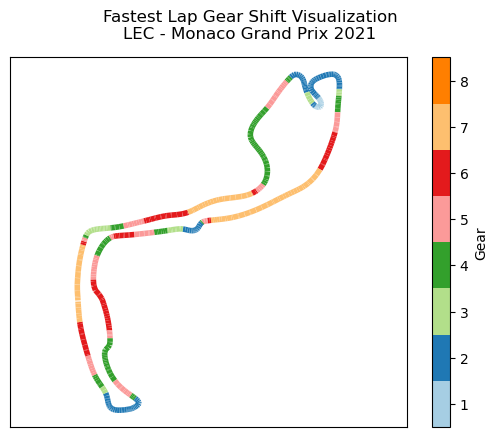

In [113]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)

cbar = plt.colorbar(mappable=lc_comp, label="Gear",
                    boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()